In [1]:
import pd3
study = pd3.Study()

In [2]:
study.load_file("/home/reap2020/notebooks/spaghetti.pb")

True

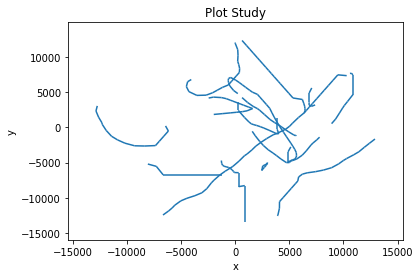

In [18]:
#plot study using line collection
import pd3
from pd3.proto.study_pb2 import IMMOBILE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import pylab as pl

def normalize(a, b, c):
    """Creates a unit vector from a, b, c"""
    vector = np.array([a, b, c])
    return vector / np.linalg.norm(vector)


def plot_study(study, x_axis=(1, 0, 0), y_axis=(0, 1, 0), timestep = 0):
    """! \brief Plots the dislocation system at the given timestep.

    Plots a given dislocation system with orthogonal axes.
    \param study Self instance.
    \param x_axis The x axis to project the system on.
    \param y_axis The y axis to projec the system on.
    \param timestep The timestep to plot.
    """
    # Ensure x_axis, y_axis are normalized
    x_axis = np.array(x_axis)
    x_axis = x_axis / np.linalg.norm(x_axis)
    y_axis = np.array(y_axis)
    y_axis = y_axis / np.linalg.norm(y_axis)
    
    # https://numpy.org/doc/stable/
    if x_axis.dot(y_axis) != 0:
        raise pd3.Pd3Exception("Provided axes are not normal.")

    # Convert our system into a graph for plotting
    # Note that the grpah is in protobuf format:
    # https://developers.google.com/protocol-buffers/docs/pythontutorial#the-protocol-buffer-api
    # In addition, fields can found in the provided documentation:
    # https://dmadisetti.github.io/pd3/api-proto-study/
    graph = study.export_protobuf()

    # Here's an example of how to break up our graph to get the edges and vertices.
    vertices = graph.state[timestep].nodes
    edges = graph.state[timestep].links

    # TODO: Plot the study with matplotlib
    # Store information from loop, and then plot it!
    # We can now choose an edge, find the id of one of the nodes, and then get a node.
    # Dylan: I think you're close, but there may be an easier way. See next comment
        # Dylan: So we need some way of converting leading in 3d space to
        # leading in 2d space, and trailing in 3d space to 2d space.
        # These transformations are independent of each other
        # (leading doesn't effect trailing and visa versa)
        # leading_2d_x = x_axis.dot(leading_3d)
        # ... the others
        # and then add those computations to an array: x_data.append(leading_2d_x)
        
    y_data = []
    x_data = []
    lines = []
    for edge in edges:
        # TODO: something with edge and the node IDs
        leading_id = edge.leading
        trailing_id = edge.trailing
        leading = vertices[leading_id]
        trailing = vertices[trailing_id]
        
        
        leading_3d = np.array([leading.x, leading.y, leading.z])
        trailing_3d = np.array([trailing.x, trailing.y, trailing.z])
        leading_2d_x = x_axis.dot(leading_3d)
        trailing_2d_x = x_axis.dot(trailing_3d)
        leading_2d_y = y_axis.dot(leading_3d)
        trailing_2d_y = y_axis.dot(trailing_3d)
        y_data.append(trailing_2d_y)
        x_data.append(trailing_2d_x)
        y_data.append(leading_2d_y)
        x_data.append(leading_2d_x)
        lines.append([(leading_2d_x, leading_2d_y), (trailing_2d_x, trailing_2d_y)])   
    
   #using line collection
    lc = mc.LineCollection(lines)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    
    plt.title("Plot Study")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.plot(x_data, y_data, 'o')

    
x = normalize(1,0,0)
y = normalize(0,1,0)
    
plot_study(study, (0,-1,1), (2,-1,-1)) # Markus's code